### Import all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

## LOADING THE DATASET

In [2]:
dataset=pd.read_csv('Sport car price.csv')
dataset

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


## DATA CLEANING

### Checking for exisitence of null values

rows containing null values in any column are counted in the sum in individual columns

In [3]:
dataset.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

### Remove all null value rows from dataset

notice the reduction row x column count due to remove of rows with null values in some column.

In [4]:
dataset=dataset.dropna()
dataset

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


### Rechecking existence of NULL values just for clarity

no more null values in dataset

In [5]:
dataset.isnull().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

### Remove duplicate rows from dataset

we can check for duplicate rows in dataset and then remove it.

In [6]:
# Remove duplicate rows based on all columns
print("Before duplicates were removed, no of rows = ", len(dataset), "\n")
dataset = dataset.drop_duplicates()
print(dataset)
print("\nAfter duplicates were removed, no of rows = ", len(dataset))

Before duplicates were removed, no of rows =  995 

         Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0         Porsche       911  2022               3        379            331   
1     Lamborghini   Huracan  2021             5.2        630            443   
2         Ferrari   488 GTB  2022             3.9        661            561   
3            Audi        R8  2022             5.2        562            406   
4         McLaren      720S  2021               4        710            568   
...           ...       ...   ...             ...        ...            ...   
999        Nissan      370Z  2021             3.7        332            270   
1002   Koenigsegg     Jesko  2022               5       1280           1106   
1003        Lotus     Evija  2021  Electric Motor       1972           1254   
1005       Pagani    Huayra  2021               6        764            738   
1006        Rimac    Nevera  2021  Electric Motor       1888           1696   


## PREPARING THE DATASET

### 1. Repairing Price column

Remove all commas with empty char so that all values are assumed to be int from string.


In [7]:
# target Price column
dataset['Price (in USD)'] = dataset['Price (in USD)'].apply(lambda x:str(x).replace(',','')).astype(int)

dataset['Price (in USD)']

C:\Users\JOYDEEP\AppData\Local\Temp/ipykernel_7876/1120447392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Price (in USD)'] = dataset['Price (in USD)'].apply(lambda x:str(x).replace(',','')).astype(int)


0        101200
1        274390
2        333750
3        142700
4        298000
         ...   
999       30090
1002    3000000
1003    2000000
1005    2600000
1006    2400000
Name: Price (in USD), Length: 707, dtype: int32

### Using Label encoding to transform string values into numerical values.

### 1. for Car Make column.

In [8]:
le=LabelEncoder()

dataset['Car Make']=le.fit_transform(dataset['Car Make'])
dataset['Car Make']

C:\Users\JOYDEEP\AppData\Local\Temp/ipykernel_7876/4133397207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Car Make']=le.fit_transform(dataset['Car Make'])


0       28
1       16
2       11
3        5
4       21
        ..
999     24
1002    15
1003    18
1005    25
1006    29
Name: Car Make, Length: 707, dtype: int32

### 2. For Engine size column.

In [9]:
dataset['Engine Size (L)']=le.fit_transform(dataset['Engine Size (L)'])
dataset['Engine Size (L)']

C:\Users\JOYDEEP\AppData\Local\Temp/ipykernel_7876/997493972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Engine Size (L)']=le.fit_transform(dataset['Engine Size (L)'])


0       11
1       24
2       17
3       24
4       18
        ..
999     15
1002    23
1003    42
1005    27
1006    42
Name: Engine Size (L), Length: 707, dtype: int32

### Note the pecularity of Engine Size column

It has few values as int, float and some as string as electric(100kW)
Its very difficult to make out engine size in litres to engine size in kW. Hence we label encode all the data rather.

In below code value_count() prints freq of each unique value in ENgine size post label encoding.

In [10]:
dataset['Engine Size (L)'].value_counts()

18    149
28     83
11     51
23     38
31     35
13     33
15     30
16     29
38     29
6      28
10     28
27     26
17     25
24     23
9      21
22     17
36     15
20      5
34      5
5       3
4       3
32      3
37      3
42      3
43      2
21      1
29      1
30      1
1       1
19      1
7       1
26      1
2       1
14      1
44      1
35      1
39      1
40      1
25      1
41      1
33      1
0       1
12      1
3       1
8       1
Name: Engine Size (L), dtype: int64

### 3. Label encode Car Model

In [11]:
dataset['Car Model']=le.fit_transform(dataset['Car Model'])
dataset['Car Model']

C:\Users\JOYDEEP\AppData\Local\Temp/ipykernel_7876/1762787977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Car Model']=le.fit_transform(dataset['Car Model'])


0        18
1        98
2         5
3       130
4        15
       ... 
999       1
1002     99
1003     76
1005     95
1006    122
Name: Car Model, Length: 707, dtype: int32

### Note the peculairty of Horse Power column

It has some few numbers ending with plus.

In [12]:
dataset['Horsepower'].value_counts()

503     37
591     27
717     22
562     22
350     21
        ..
482      1
1262     1
1035     1
819      1
1888     1
Name: Horsepower, Length: 121, dtype: int64

### 4. Label encode Horse Power

In [13]:
dataset['Horsepower']=le.fit_transform(dataset['Horsepower'])
dataset['Horsepower']

C:\Users\JOYDEEP\AppData\Local\Temp/ipykernel_7876/2357972466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Horsepower']=le.fit_transform(dataset['Horsepower'])


0        39
1        89
2        96
3        69
4       101
       ... 
999      32
1002     10
1003     20
1005    111
1006     18
Name: Horsepower, Length: 707, dtype: int32

### 5. Label encode torque

In [14]:
dataset['Torque (lb-ft)']=le.fit_transform(dataset['Torque (lb-ft)'])
dataset['Torque (lb-ft)']

C:\Users\JOYDEEP\AppData\Local\Temp/ipykernel_7876/4082570330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Torque (lb-ft)']=le.fit_transform(dataset['Torque (lb-ft)'])


0       27
1       43
2       67
3       38
4       68
        ..
999     20
1002     6
1003     8
1005    87
1006    11
Name: Torque (lb-ft), Length: 707, dtype: int32

### 6. Label encode 0-60mph time

In [15]:
dataset['0-60 MPH Time (seconds)']=le.fit_transform(dataset['0-60 MPH Time (seconds)'])
dataset['0-60 MPH Time (seconds)']

C:\Users\JOYDEEP\AppData\Local\Temp/ipykernel_7876/534365566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['0-60 MPH Time (seconds)']=le.fit_transform(dataset['0-60 MPH Time (seconds)'])


0       25
1       13
2       15
3       17
4       12
        ..
999     36
1002    10
1003     5
1005    15
1006     1
Name: 0-60 MPH Time (seconds), Length: 707, dtype: int32

### Finally we have repaired our dataset

Lets view all the values and datatypes of all columns for clarity.

In [16]:
dataset.describe()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.00000,7.070000e+02
mean,15.705799,85.785007,2021.151344,20.291372,65.868458,48.842999,20.71570,3.808800e+05
std,9.023012,48.880373,2.347564,8.731271,29.365499,23.050676,7.99237,7.652793e+05
min,0.000000,0.000000,1965.000000,0.000000,0.000000,0.000000,0.00000,2.500000e+04
25%,8.000000,52.000000,2021.000000,15.000000,47.000000,31.000000,15.00000,7.000000e+04
50%,16.000000,80.000000,2021.000000,18.000000,66.000000,47.000000,20.00000,1.324000e+05
75%,23.000000,123.500000,2022.000000,28.000000,89.000000,69.000000,25.00000,2.250000e+05
max,37.000000,175.000000,2023.000000,44.000000,120.000000,91.000000,42.00000,5.200000e+06


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Car Make                 707 non-null    int32
 1   Car Model                707 non-null    int32
 2   Year                     707 non-null    int64
 3   Engine Size (L)          707 non-null    int32
 4   Horsepower               707 non-null    int32
 5   Torque (lb-ft)           707 non-null    int32
 6   0-60 MPH Time (seconds)  707 non-null    int32
 7   Price (in USD)           707 non-null    int32
dtypes: int32(7), int64(1)
memory usage: 30.4 KB


### Few Modifications in Year column

We set values of year column to be the difference between the current year and the year given, higher the value the older the car.

In [18]:
from datetime import date

CURRENT_YEAR = date.today().year  ## NOTE TO DECLARE CURRENT YEAR AS A CONSTANT(VARIBLE NAME ALL CAPS) IN ORDER TO WORK
print("Current Year is ",CURRENT_YEAR)

dataset['Year'] = CURRENT_YEAR - dataset['Year']

# dataset['Year'] = 2023 - dataset['Year']
dataset['Year']

Current Year is  2023


C:\Users\JOYDEEP\AppData\Local\Temp/ipykernel_7876/3852663372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Year'] = CURRENT_YEAR - dataset['Year']


0       1
1       2
2       1
3       1
4       2
       ..
999     2
1002    1
1003    2
1005    2
1006    2
Name: Year, Length: 707, dtype: int64

### Reviewing our latest dataset

In [19]:
dataset

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,18,1,11,39,27,25,101200
1,16,98,2,24,89,43,13,274390
2,11,5,1,17,96,67,15,333750
3,5,130,1,24,69,38,17,142700
4,21,15,2,18,101,68,12,298000
...,...,...,...,...,...,...,...,...
999,24,1,2,15,32,20,36,30090
1002,15,99,1,23,10,6,10,3000000
1003,18,76,2,42,20,8,5,2000000
1005,25,95,2,27,111,87,15,2600000


## TRAIN TEST SPLIT

X contains all independent columns

Y contains only the dependent column(s)

X_train is used for independent values for train, and y_train is the corresponding result to train data.

In [20]:
X = dataset.drop(columns=['Price (in USD)'],axis=1)
Y = dataset['Price (in USD)']
# split data into training and testing sets 80 - 20 size
X_train, X_test, y_train, y_test = train_test_split(X, Y,  test_size=0.33, random_state=42)

# print(X_train, y_train, X_test, y_test, sep="\n\n")

## INITALIZE THE MODEL(S)

Here we use xgboost regressor as it gives quite good accuracy.

In [21]:
from xgboost import XGBRegressor
model = XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## TRAIN OUR MODEL

In [22]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## PREDICT VALUES POST TRAINING 

In [23]:
# over train set for overfitting and underfitting check
y_train_pred = model.predict(X_train)
print("Train value predicted : ",y_train_pred)

# over actual test set
y_test_pred = model.predict(X_test)
print("\n\nTest value predicted : ",y_test_pred)

Train value predicted :  [  93666.24    76941.59    83547.055  101614.23    76110.695 3599928.8
   45324.61  2900273.5    222258.14  2299938.2    517751.06   222218.34
  208049.73   497149.66    70261.05   212661.39    66662.51   225100.53
   71870.57   222085.47   149886.38   210490.8    146496.16   222009.27
  163809.02   100869.47  3001328.     101614.23   104777.01  2800809.2
  115083.85   103826.67   212847.47   200308.3   1000086.6     58338.465
   68751.17   443622.62    65106.582  254553.97  2601209.2   2399953.5
  140893.7     68093.05   210504.45   222111.1    101471.49  2500308.
  100253.32   214509.36   215675.44    40581.473  407046.06    76110.695
  304552.6     74707.69    68093.05    94842.51   202208.3    456502.97
  217258.27   146014.36    59142.85    25577.805   46956.758  136616.08
  186233.27    56616.36   274633.5     73256.08  2400248.      76036.39
   31048.758   62665.074  101471.49    74761.5    443622.62    79673.17
   62553.914   69920.09    30770.021  1035

## ACCURACY OF MODEL

### 1. Check for overfitting or underfitting of dataset by checking accuracy over the same train set

Accuracy is nearly 99% or r2_score is near about 0.99 which tells our model has no problems.

In [24]:
score_1 = metrics.r2_score(y_train, y_train_pred)
print("(testing) r2_score over train set : ", score_1) 
acc = (score_1*100)
print("(testing) Accuracy : %.3f" % acc , "%")

(testing) r2_score over train set :  0.999859655975105
(testing) Accuracy : 99.986 %


### 2. Actual score over test set calculated.

In [25]:
score_2 = metrics.r2_score(y_test,y_test_pred)
print("(testing) r2_score over train set : ", score_2) 
acc = (score_2*100)
print("(testing) Accuracy : %.3f" % acc , "%")

(testing) r2_score over train set :  0.9379010009705779
(testing) Accuracy : 93.790 %


## PLOT THE PREDICTED DATA

actual data in y_test almost coincides with y_test predicted values.

Text(0, 0.5, 'Car Price')

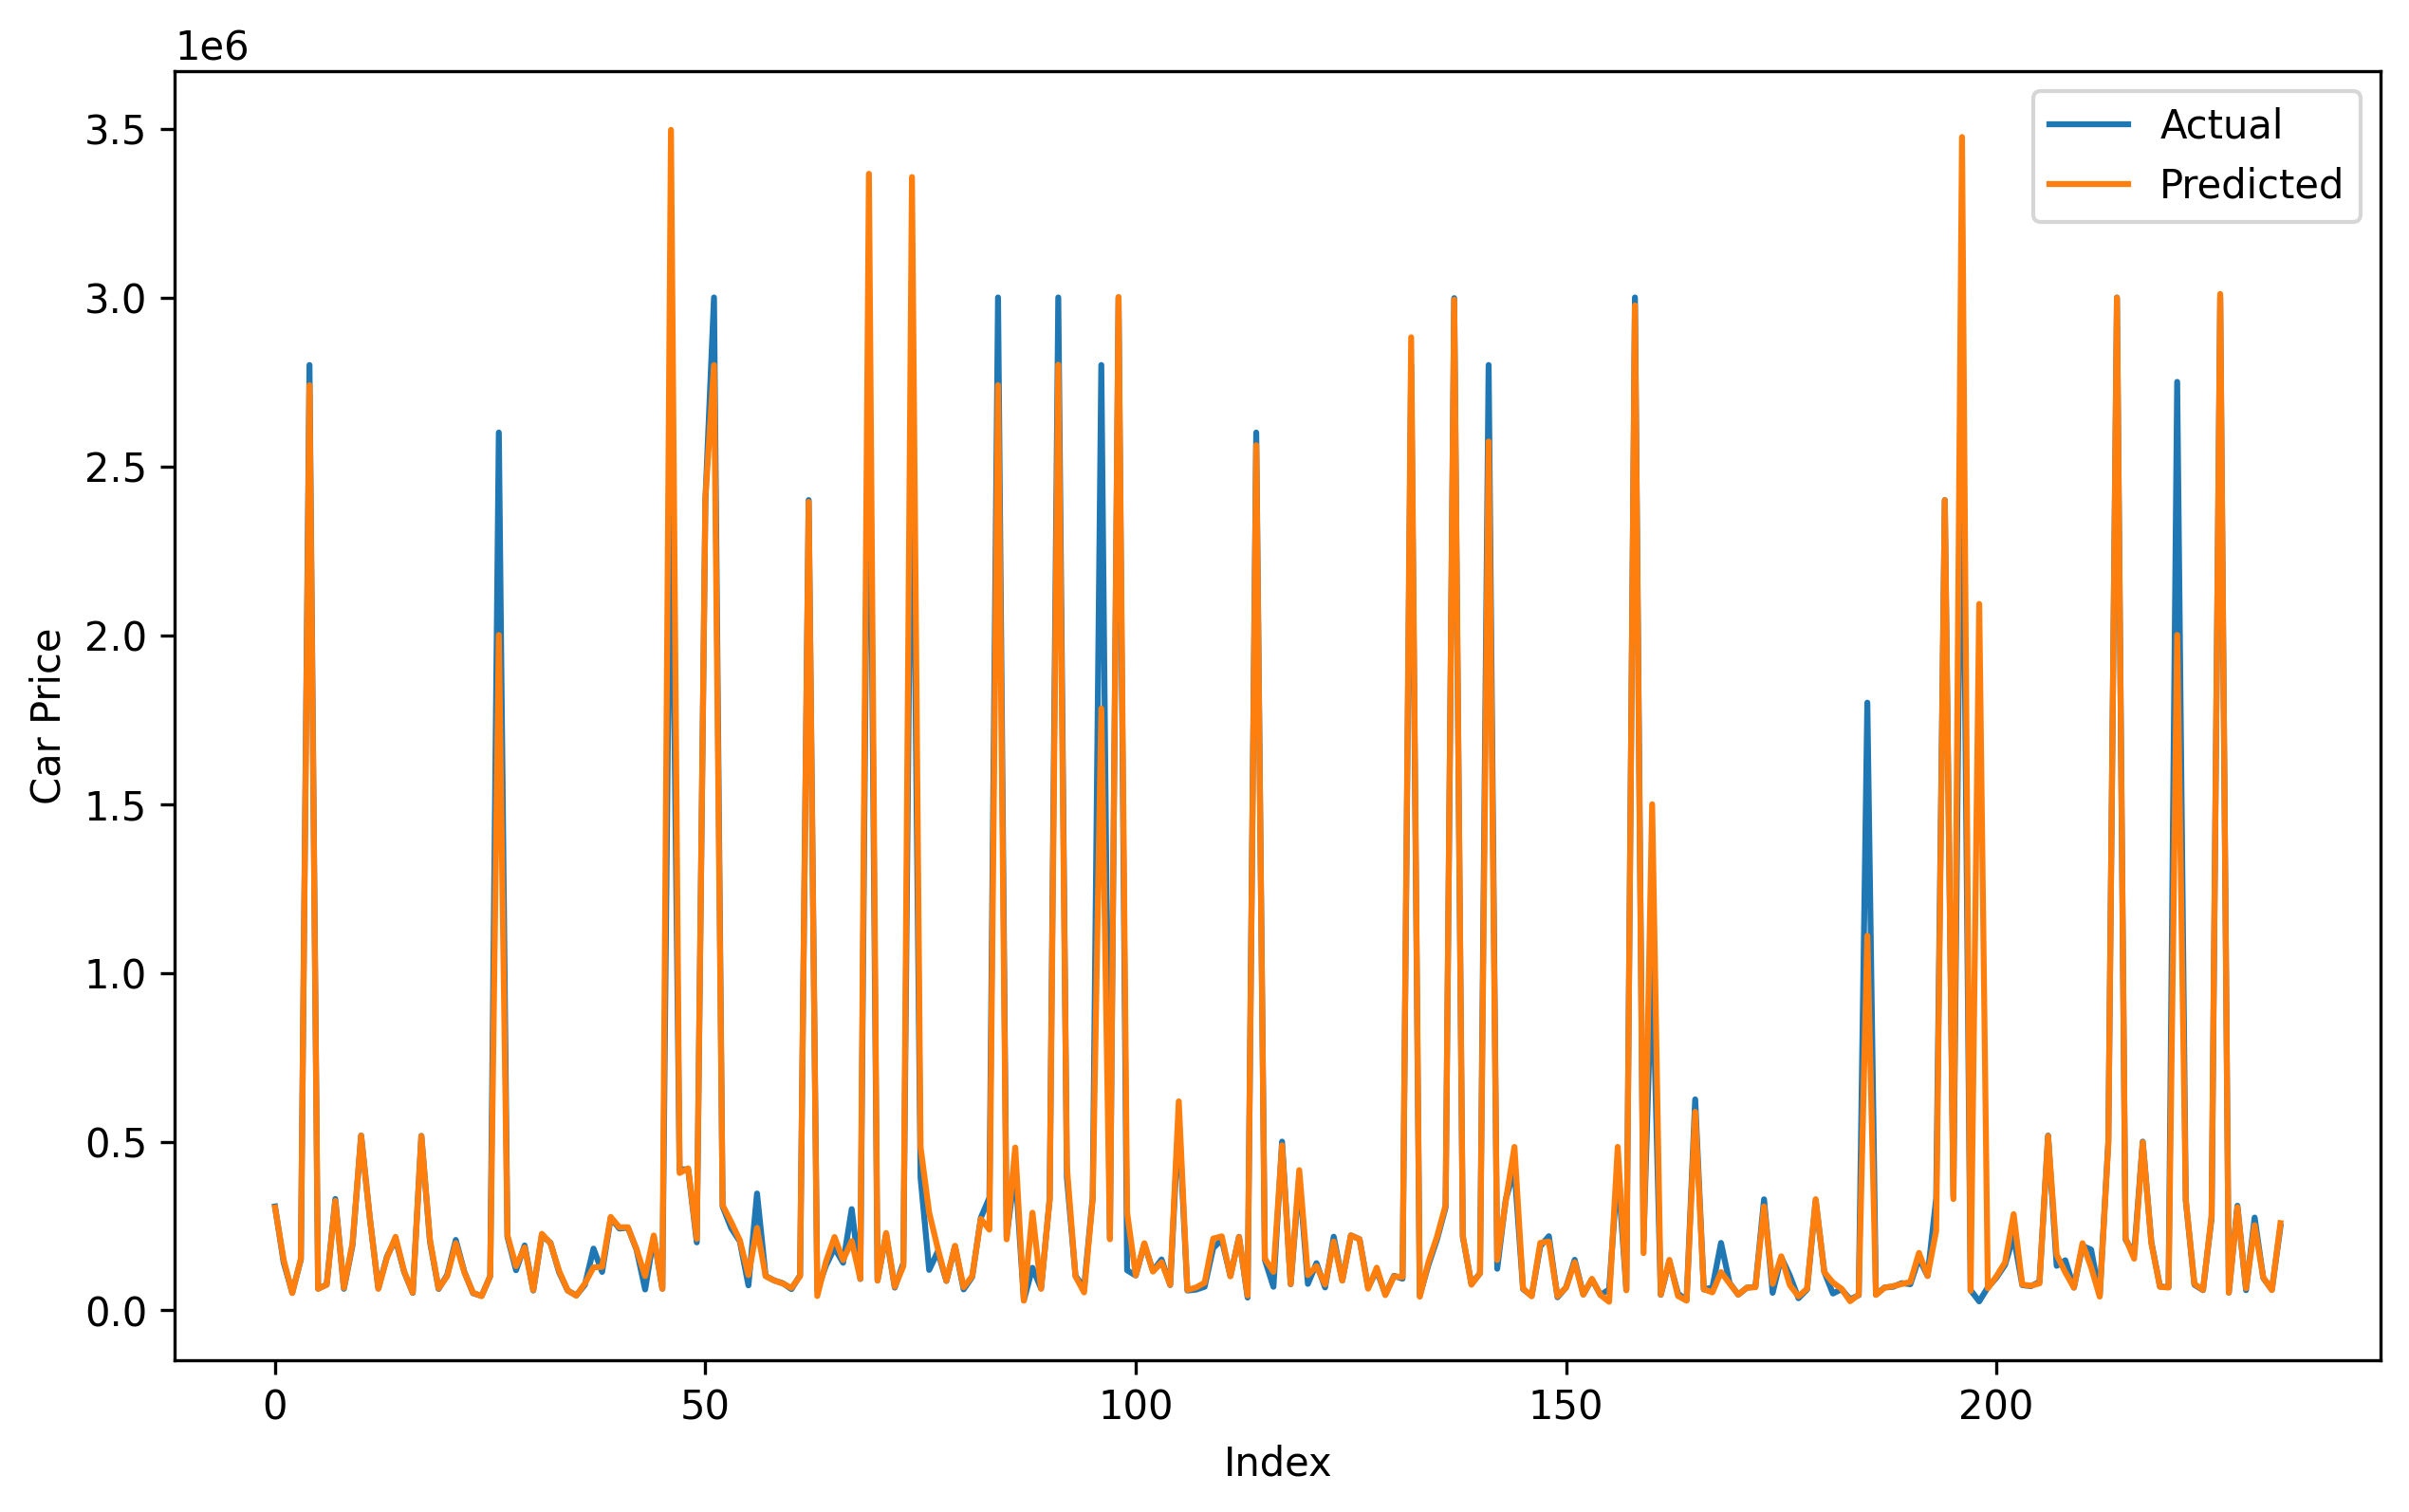

In [26]:
# create x-axis data from 0 till len of y_test(y_train cant be plotted easily due to multi parameters)
x_size = range(len(y_test))

# plot actual y_test and predicted y_test_pred values
plt.figure(figsize=(10,6), dpi=300) # increase figure size and DPI
plt.plot(x_size, y_test, label='Actual', antialiased=True) # enable anti-aliasing
plt.plot(x_size, y_test_pred, label='Predicted', antialiased=True) # enable anti-aliasing

# add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Car Price')
